<a href="https://colab.research.google.com/github/ankojubhanuprakash/WorkSpace/blob/main/Deep_learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


### 1.1 Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import time



### 1.2 Check and Load GPU

In [ ]:
print('TensorFlow version: {}'.format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found - On for CPU time!')
else:
    print('Found GPU at {}'.format(device_name))

TensorFlow version: 2.7.0
Found GPU at /device:GPU:0


# Train-Val Split

# Load DataSet 

In [ ]:
True_news = pd.read_csv('drive/MyDrive/True.csv')
True_news['Class'] = 1
True_news['c_label'] = 'Real'
Fake_news = pd.read_csv('drive/MyDrive/Fake.csv')
Fake_news['Class'] = 0
Fake_news['c_label'] = 'Fake'

df = pd.concat([True_news, Fake_news], axis=0, join="inner")
df=df.reset_index().drop('index',axis=1)
df.sample(5)

,title,text,subject,date,Class,c_label
2983,President Trump to attend Paris July 14 celebr...,PARIS (Reuters) - President Donald Trump will ...,politicsNews,"June 28, 2017",1,Real
32959,LIVE FEED-LIVE CHAT: PRESIDENT TRUMP Addresses...,,politics,"Feb 28, 2017",0,Fake
28878,The Pope Has Some Bad News For The Ambassador...,"As we all remember last year, Pope Francis mad...",News,"March 16, 2016",0,Fake
5876,U.S. tempers part of Trump travel ban amid big...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"January 29, 2017",1,Real
39883,BREAKING: WATCH TWO PROTESTERS Crash ‘Trump As...,Awesome! Two protesters crashed the Trump Ass...,left-news,"Jun 18, 2017",0,Fake


### 2.1 Print at least two records from each class of the dataset, for a sanity check that labels match the text

In [ ]:
True_news[['title','c_label']].sample(5)

,title,c_label
19000,Kenyan police disperse protests against electi...,Real
18770,EU's Verhofstadt pokes fun at British PM May b...,Real
5825,U.S. Senate panel postpones hearing for Labor ...,Real
19409,Argentina's Macri almost certain to run for re...,Real
11329,Japan says revising comfort women agreement wi...,Real


In [ ]:
Fake_news[['title','c_label']].sample(5)

,title,c_label
14965,BREAKING: Obama Campaigned For But Now Rejects...,Fake
8805,"President Obama: Surely, Trump Can Only Be Pr...",Fake
1020,Trump Might Have Just Put Himself In Prison W...,Fake
4865,WATCH: Chuck Todd BLISTERS RNC Chair Over Tru...,Fake
13527,"ONLY DAYS AGO…BATON ROUGE THUG, #BlackLives Ma...",Fake


### 2.2 Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset

In [ ]:
class_counts = df.c_label.value_counts()
class_counts

Fake    23481
Real    21417
Name: c_label, dtype: int64

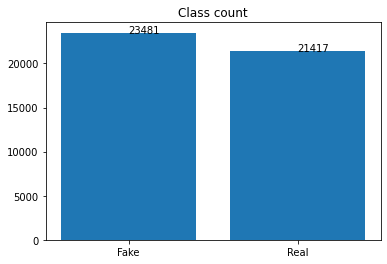

In [ ]:
plt.title('Class count')
plt.bar(class_counts.index,class_counts.values)
xlocs = [i for i in range(class_counts.shape[0])]
for i, v in enumerate(class_counts.values):
    plt.text(xlocs[i] , v, str(v))



# Cleaning
 1. Removing punctutation and numbers. 
 2. Replacing extra spaces with single space.   
 santiy check of formatting

In [ ]:
def clean_text(text):
    chars = ',<.>/?;:"[{}]|)(*&^%$#@!=+-_0123456789'
    text = text.lower()
    for l in chars:
        text = text.replace(l, str(' '+l+' '))
        text = text.replace('  ',' ')
    return text

In [ ]:
temp = pd.Series([clean_text(i) for i in df.loc[:,'title'].tolist()])

In [ ]:
df['mtitle']=temp

In [ ]:
df.loc[:,['title','mtitle']].sample(10)

,title,mtitle
32040,#CongressionalBaseballGame Shooter Identified:...,# congressionalbaseballgame shooter identifie...
3885,"Rice chides Trump for criticism of judges, media","rice chides trump for criticism of judges , media"
27488,Judge Recommends Joe Arpaio For Criminal Pros...,judge recommends joe arpaio for criminal pros...
40860,BEST MELTDOWN OF 2016! TUCKER CARLSON BLASTS S...,best meltdown of 2 0 1 6 ! tucker carlson blas...
8878,Speaker Ryan: declining to prosecute Clinton b...,speaker ryan : declining to prosecute clinton ...
36617,PRIORITIES: Who Does Obama Invite To White Hou...,priorities : who does obama invite to white ho...
20513,Havana braced for floods after Hurricane Irma ...,havana braced for floods after hurricane irma ...
43195,MOOCH SAYS BLACK KIDS AREN’T AS WELCOME IN MUS...,mooch says black kids aren’t as welcome in mus...
6841,"Trump to meet with Chicago mayor, North Caroli...","trump to meet with chicago mayor , north carol..."
34411,MICHELLE OBAMA TO HILLARY: “If You Can’t Run Y...,michelle obama to hillary : “if you can’t run ...


# test train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['mtitle'],df['Class'] , test_size=0.33, random_state=42)


### 2.4  Print the shapes of train, validation and test data.

In [ ]:
X_val,y_val= X_train[25000:],y_train[25000:]
X_train,y_train=X_train[:25000],y_train[:25000]
X_test_copy=X_test

In [ ]:
print('Train data size id',X_train.shape)
print('Validation data size id',X_val.shape)
print('Test data size id',X_test.shape)

Train data size id (25000,)
Validation data size id (5081,)
Test data size id (14817,)


In [ ]:
X_train

30885    panda ‘photobombs’ melania trump on trip to be...
40751    obama makes stunning 1 1 th hour gift of massi...
603      u . s . interior secretary fails to provide pa...
32002    breaking : watch two protesters crash ‘trump a...
7102     north carolina governor requests vote recount ...
                               ...                        
14191    arrested indonesian parliament speaker pleads ...
18581    anti - government chants ring out on anniversa...
20435    philippines seeks big cut in drug rehab budget...
17600    turkey issues detention warrants for 1 1 5 peo...
27938     great job , gop : white supremacists so happy...
Name: mtitle, Length: 25000, dtype: object

## 3 Datapreprocessing
using [tfhub pretrained embedding model](https://tfhub.dev/google/nnlm-en-dim128/1)
convert text sequence to a vectoer of size 128.

 

In [ ]:
#import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_hub as hub

hub_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
embed = hub.KerasLayer(hub_url)

In [ ]:
X_train,X_val,X_test=embed(X_train),embed(X_val),embed(X_test)

In [ ]:
print(X_train.shape,X_val.shape,X_test.shape)

(25000, 128) (5081, 128) (14817, 128)


### 4. Model Building

1. Only fully connected layers, with decreasing number of hidden units were implemented.[ input, 64,32,10,1] and with relu activation function.
2. L2 norm is added for every dense layer.
3. Dropout(rate=0.5) is added at layer with 64 hidden units, because chance of coadaptation is high for layers with more hidden units.   

##### References
1. https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
2. https://www.geeksforgeeks.org/dropout-in-neural-networks/

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(128)))
model.add(tf.keras.layers.Dense(64,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))# drop out for layer with 64 hidden units
model.add(tf.keras.layers.Dense(32,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(10,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 10)                330       
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,677
Trainable params: 10,677
Non-trainable params: 0
_________________________________________________________________


### 5. Model Compilation
1. loss function is binary cross entropy, since modelis binary classification.
2. ADAM optimiser is used since "The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients". learning rate is chose small value to avoid jumping over the minima.

#### Refences
1. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=tf.keras.metrics.BinaryAccuracy())

### 6. Model Training

In [ ]:
start= time.perf_counter()
history=model.fit(x=X_train,y= y_train, epochs=25, batch_size=100,validation_data=(X_val,y_val) )
elapsed = time.perf_counter() - start

Epoch 1/25
250/250 [==============================] - 2s 5ms/step - loss: 1.9253 - binary_accuracy: 0.5555 - val_loss: 1.7174 - val_binary_accuracy: 0.6709
Epoch 2/25
250/250 [==============================] - 1s 4ms/step - loss: 1.5539 - binary_accuracy: 0.6490 - val_loss: 1.4006 - val_binary_accuracy: 0.7532
Epoch 3/25
250/250 [==============================] - 1s 4ms/step - loss: 1.2800 - binary_accuracy: 0.7313 - val_loss: 1.1572 - val_binary_accuracy: 0.8303
Epoch 4/25
250/250 [==============================] - 1s 4ms/step - loss: 1.0608 - binary_accuracy: 0.8029 - val_loss: 0.9445 - val_binary_accuracy: 0.8697
Epoch 5/25
250/250 [==============================] - 1s 4ms/step - loss: 0.8661 - binary_accuracy: 0.8422 - val_loss: 0.7611 - val_binary_accuracy: 0.8825
Epoch 6/25
250/250 [==============================] - 1s 4ms/step - loss: 0.7241 - binary_accuracy: 0.8603 - val_loss: 0.6487 - val_binary_accuracy: 0.8860
Epoch 7/25
250/250 [==============================] - 1s 4ms/ste

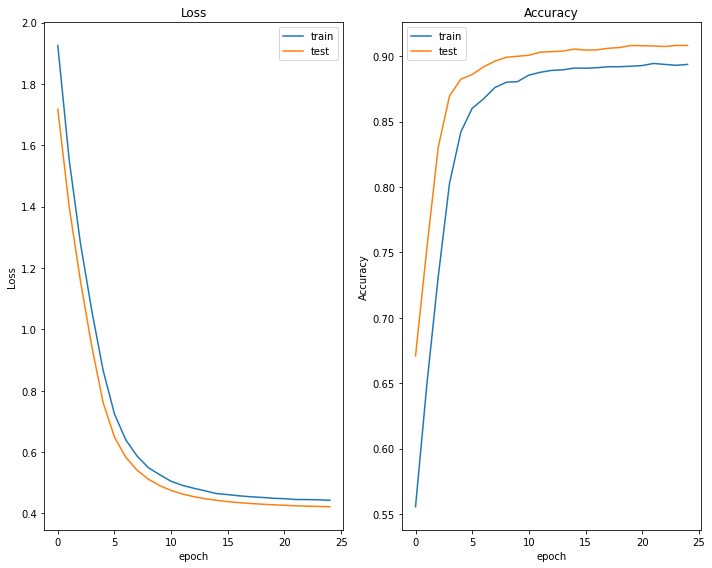

In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']

fig, ax = plt.subplots(1,2)
ax[0].plot(train_loss)
ax[0].plot(val_loss)
ax[0].legend(['train','test'])


ax[1].plot(train_acc)
ax[1].plot(val_acc)
ax[1].legend(['train','test'])

ax[0].set_title('Loss')
ax[1].set_title('Accuracy') 

ax[0].set_xlabel('epoch')
ax[1].set_xlabel('epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

fig.set_figheight(8)
fig.set_figwidth(10)
fig.tight_layout() 

plt.show() 
plt.show()

In [ ]:
print('Elapsed %.3f seconds.' % elapsed)

Elapsed 26.733 seconds.


### 7. Model Evaluation 


In [ ]:
print('Final training accuracy is %.3f ' % train_acc[-1])
print('Final validation accuracy is %.3f ' % val_acc[-1])
print('Final training loss is %.4f ' % train_loss[-1])
print('Final validation loss is %.4f ' % val_loss[-1])

Final training accuracy is 0.894 
Final validation accuracy is 0.908 
Final training loss is 0.4429 
Final validation loss is 0.4218 


In [ ]:
y_test_pred= model.predict(X_test)

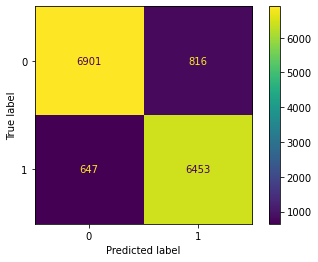

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, np.round(y_test_pred))

In [ ]:
print(classification_report(y_test,np.round(y_test_pred)))
print('As per f1-score Model performs equally good on predicting Real news and Fake news. ')

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7717
           1       0.89      0.91      0.90      7100

    accuracy                           0.90     14817
   macro avg       0.90      0.90      0.90     14817
weighted avg       0.90      0.90      0.90     14817

As per f1-score Model performs equally good on predicting Real news and Fake news. 


### the following dataframe contains mislabled records.


In [ ]:
error_df = pd.DataFrame(y_test)
error_df['predicted']=np.round(y_test_pred).astype('int32')
error_df['pred_prob']=y_test_pred
error_df = error_df.loc[error_df['Class']!= error_df['predicted']]
print(error_df.sample(5))


       Class  predicted  pred_prob
17730      1          0   0.390428
43457      0          1   0.569064
42339      0          1   0.745115
22507      0          1   0.791670
34113      0          1   0.554377


7.2 Print the two most incorrectly classified records for each class in the test dataset.   
 Below Dataframe, contains records of 'Real news' but which are mislabelled as 'Fake news', sorted descending based on prediction accuracy.

In [ ]:
error_df[error_df.Class==0].sort_values('pred_prob',axis=0,ascending=False)

,Class,predicted,pred_prob
43653,0,1,0.950760
42862,0,1,0.950173
43631,0,1,0.949643
31990,0,1,0.948831
43904,0,1,0.948036
...,...,...,...
26587,0,1,0.503632
31674,0,1,0.502940
35778,0,1,0.501876
29463,0,1,0.501440


In [ ]:
temp=X_test_copy[error_df[error_df.Class==1].sort_values('pred_prob',axis=0,ascending=False).index[0:2]].values
print('The top two Real news mislabelled as Fake news are following ')
print(1,'. ',temp[0])
print(2,'. ',temp[1])
temp=X_test_copy[error_df[error_df.Class==0].sort_values('pred_prob',axis=0,ascending=False).index[0:2]].values
print('\nThe top two Fake news mislabelled as Real news are following ')
print(1,'. ',temp[0])
print(2,'. ',temp[1])

The top two Real news mislabelled as Fake news are following 
1 .  cbs poll shows clinton with 4 - point lead vs trump in white house race
2 .  four yemeni soldiers killed by suspected al qaeda truck bombing

The top two Fake news mislabelled as Real news are following 
1 .  potential shift : trump warns israel , ‘new settlements may not help peace in middle east’
2 .  eu leaders pledge extra € 1 billion in aid to refugees…slovakia will take eu to court over forced refugee quotas


## Hyperparameter Tuning-   
1. Regularization: Train a model without regularization


Model Building - No regularisation on hidden layers
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 10)                330       
                                                                 
 dense_63 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,677
Trainable params: 10,677
Non-trainable params: 0
_______________________________________________________________

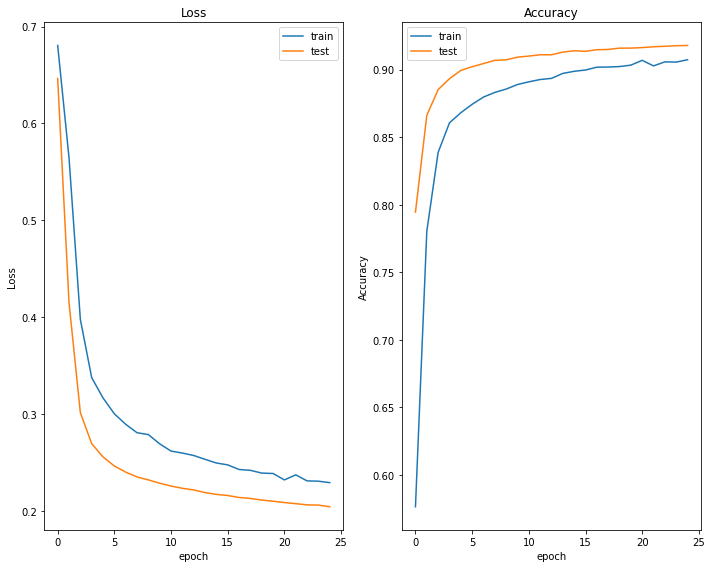

In [ ]:
print('Model Building - No regularisation on hidden layers')
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(128)))
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))# drop out for layer with 64 hidden units
model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='relu'))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(model1.summary())
print('Similar to first model, optimiser is adam, loss- binary cross entropy loss, accuracy- binary accuracy')
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=tf.keras.metrics.BinaryAccuracy())
start= time.perf_counter()
history1=model1.fit(x=X_train,y= y_train, epochs=25, batch_size=100,validation_data=(X_val,y_val) )
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
print('Model evaluation')
train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
train_acc=history1.history['binary_accuracy']
val_acc=history1.history['val_binary_accuracy']

fig, ax = plt.subplots(1,2)
ax[0].plot(train_loss)
ax[0].plot(val_loss)
ax[0].legend(['train','test'])


ax[1].plot(train_acc)
ax[1].plot(val_acc)
ax[1].legend(['train','test'])

ax[0].set_title('Loss')
ax[1].set_title('Accuracy') 

ax[0].set_xlabel('epoch')
ax[1].set_xlabel('epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

fig.set_figheight(8)
fig.set_figwidth(10)
fig.tight_layout() 

plt.show() 
plt.show()


Final training accuracy is 0.907 
Final validation accuracy is 0.918 
Final training loss is 0.2292 
Final validation loss is 0.2044 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7717
           1       0.91      0.91      0.91      7100

    accuracy                           0.91     14817
   macro avg       0.91      0.91      0.91     14817
weighted avg       0.91      0.91      0.91     14817

As per f1-score Model performs slightly better on predicting Real news and Fake news. 
The top two Real news mislabelled as Fake news are following 
1 .  clinton backer george clooney condemns 'obscene' sums in white house race
2 .  senate leader mcconnell says 'nobody wants terrorists to have firearms'

The top two Fake news mislabelled as Real news are following 
1 .  n . korea warns it will strike u . s . bases in s . korea…mike pence travels to s . korea as sign of commitment to ally…china warns of “war at any moment”
2 .  n . ko

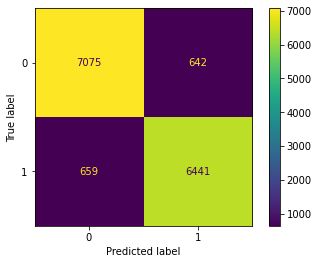

In [ ]:
print('Final training accuracy is %.3f ' % train_acc[-1])
print('Final validation accuracy is %.3f ' % val_acc[-1])
print('Final training loss is %.4f ' % train_loss[-1])
print('Final validation loss is %.4f ' % val_loss[-1])
y_test_pred= model1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, np.round(y_test_pred))
print(classification_report(y_test,np.round(y_test_pred)))
print('As per f1-score Model performs slightly better on predicting Real news and Fake news. ')

error_df = pd.DataFrame(y_test)
error_df['predicted']=np.round(y_test_pred).astype('int32')
error_df['pred_prob']=y_test_pred
error_df = error_df.loc[error_df['Class']!= error_df['predicted']]
error_df[error_df.Class==0].sort_values('pred_prob',axis=0,ascending=False)
temp=X_test_copy[error_df[error_df.Class==1].sort_values('pred_prob',axis=0,ascending=False).index[0:2]].values
print('The top two Real news mislabelled as Fake news are following ')
print(1,'. ',temp[0])
print(2,'. ',temp[1])
temp=X_test_copy[error_df[error_df.Class==0].sort_values('pred_prob',axis=0,ascending=False).index[0:2]].values
print('\nThe top two Fake news mislabelled as Real news are following ')
print(1,'. ',temp[0])
print(2,'. ',temp[1])




### Hyperparameter tuning   
2. Dropout: Change the position and value of dropout layer?   
Changed droppoout from 64 hidden unit`s layer to 32 hidden units layer and dropout changed rom 0.5 to 0.8


Model Building - Changed droppoy from 64 hidden unit`s layer to 32 hidden units layer and dropout changed rom 0.5 to 0.8
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 64)                8256      
                                                                 
 dense_65 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_66 (Dense)            (None, 10)                330       
                                                                 
 dense_67 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,677
Trainable params: 10,677
Non-trainable para

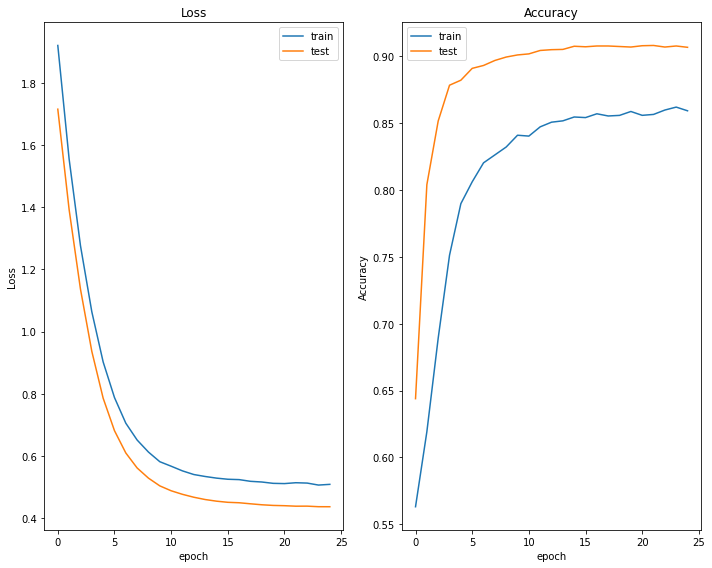

In [ ]:
print('Model Building - Changed droppout from 64 hidden unit`s layer to 32 hidden units layer and dropout changed rom 0.5 to 0.8')
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(128)))
model2.add(tf.keras.layers.Dense(64,kernel_regularizer='l2', activation='relu'))
model2.add(tf.keras.layers.Dense(32,kernel_regularizer='l2', activation='relu'))
model2.add(tf.keras.layers.Dropout(0.8))# drop out for layer with 32 hidden units
model2.add(tf.keras.layers.Dense(10,kernel_regularizer='l2', activation='relu'))
model2.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))
print(model2.summary())
print('Similar to first model, optimiser is adam, loss- binary cross entropy loss, accuracy- binary accuracy')
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=tf.keras.metrics.BinaryAccuracy())
start= time.perf_counter()
history2=model2.fit(x=X_train,y= y_train, epochs=25, batch_size=100,validation_data=(X_val,y_val) )
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
print('Model evaluation')
train_loss=history2.history['loss']
val_loss=history2.history['val_loss']
train_acc=history2.history['binary_accuracy']
val_acc=history2.history['val_binary_accuracy']

fig, ax = plt.subplots(1,2)
ax[0].plot(train_loss)
ax[0].plot(val_loss)
ax[0].legend(['train','test'])


ax[1].plot(train_acc)
ax[1].plot(val_acc)
ax[1].legend(['train','test'])

ax[0].set_title('Loss')
ax[1].set_title('Accuracy') 

ax[0].set_xlabel('epoch')
ax[1].set_xlabel('epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

fig.set_figheight(8)
fig.set_figwidth(10)
fig.tight_layout() 

plt.show() 
plt.show()


Final training accuracy is 0.859 
Final validation accuracy is 0.907 
Final training loss is 0.5091 
Final validation loss is 0.4371 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7717
           1       0.89      0.91      0.90      7100

    accuracy                           0.90     14817
   macro avg       0.90      0.90      0.90     14817
weighted avg       0.90      0.90      0.90     14817

As per f1-score Model performs equally good on predicting Real news and Fake news. 
The top two Real news mislabelled as Fake news are following 
1 .  obama to visit u . s . mosque to counter republican rhetoric about muslims
2 .  cuba marks anniversary of fidel death as post - castro era nears

The top two Fake news mislabelled as Real news are following 
1 .  eu leaders pledge extra € 1 billion in aid to refugees…slovakia will take eu to court over forced refugee quotas
2 .  potential shift : trump warns israel , ‘new settlements m

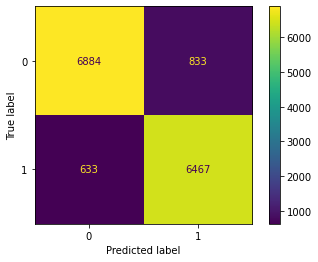

In [ ]:
print('Final training accuracy is %.3f ' % train_acc[-1])
print('Final validation accuracy is %.3f ' % val_acc[-1])
print('Final training loss is %.4f ' % train_loss[-1])
print('Final validation loss is %.4f ' % val_loss[-1])
y_test_pred= model2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, np.round(y_test_pred))
print(classification_report(y_test,np.round(y_test_pred)))
print('As per f1-score Model performs equally good on predicting Real news and Fake news. ')
error_df = pd.DataFrame(y_test)
error_df['predicted']=np.round(y_test_pred).astype('int32')
error_df['pred_prob']=y_test_pred
error_df = error_df.loc[error_df['Class']!= error_df['predicted']]
error_df[error_df.Class==0].sort_values('pred_prob',axis=0,ascending=False)
temp=X_test_copy[error_df[error_df.Class==1].sort_values('pred_prob',axis=0,ascending=False).index[0:2]].values
print('The top two Real news mislabelled as Fake news are following ')
print(1,'. ',temp[0])
print(2,'. ',temp[1])
temp=X_test_copy[error_df[error_df.Class==0].sort_values('pred_prob',axis=0,ascending=False).index[0:2]].values
print('\nThe top two Fake news mislabelled as Real news are following ')
print(1,'. ',temp[0])
print(2,'. ',temp[1])


# Coclusion Across models
1. As per finaly validation accuracy and loss Model2 (Without regularisation) performed well across all models. Absence of regularising contraint could be reson of good accuracy. 
2. Usually absence of regularisation leads to overfitting, but test accuracy and loss plots show model is not overfitting.
3. Replotted best model's (model without regularistion) training and validation loss and accuracy curves below.    

Final Validation Accuracy - 0.918    
Final Validation loss - 0.2044    
F1-score for True News - 0.92   
F-1 score for Fake News - 0.91         



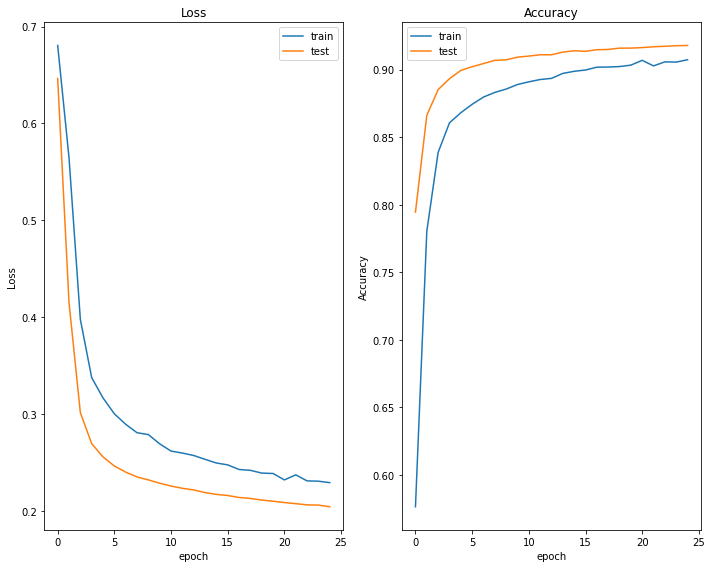

In [ ]:

train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
train_acc=history1.history['binary_accuracy']
val_acc=history1.history['val_binary_accuracy']

fig, ax = plt.subplots(1,2)
ax[0].plot(train_loss)
ax[0].plot(val_loss)
ax[0].legend(['train','test'])


ax[1].plot(train_acc)
ax[1].plot(val_acc)
ax[1].legend(['train','test'])

ax[0].set_title('Loss')
ax[1].set_title('Accuracy') 

ax[0].set_xlabel('epoch')
ax[1].set_xlabel('epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

fig.set_figheight(8)
fig.set_figwidth(10)
fig.tight_layout() 

plt.show() 
plt.show()
